In [256]:
## importing the necessary libraries
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np

In [9]:
## reading data
os.chdir('/Users/reinaldodeoliveiramaciel/Desktop/Reinaldo/202003/13032020')
df_raw = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df_raw.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
### checking datatype for columns
df_raw.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

As we can see above, there are some data that is considered as a continous variable but should be a categorical one. I'll convert the following to categorical:
- ID;
- ZIP Code;
- Family;
- Education;
- Personal Loan
- Securities Account;
- CD Account
- Online
- CreditCard

And finally, I'll follow some naming convention here:
- variables can't have spaces
- Names will be camel case

Then, I'll import the dataframe again

In [16]:
df_raw = pd.read_csv('Bank_Personal_Loan_Modelling.csv',
                     header = 0,
                     dtype = {'ID':str, 'Age':int, 'Experience':int, 'Income':float, 'ZIP Code':str, 'Family':str, 'CCAvg':float,
       'Education':str, 'Mortgage':float, 'Personal Loan':str, 'Securities Account':str,'CD Account':str, 'Online':str, 'CreditCard':str},
                    names=['Id', 'Age', 'Experience', 'Income', 'ZipCode', 'Family', 'CcAvg', 'Education', 'Mortgage',
                          'PersonalLoan','SecuritiesAccount','CdAccount','Online','CreditCard'])
df_raw.head()

,Id,Age,Experience,Income,ZipCode,Family,CcAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CdAccount,Online,CreditCard
0,1,25,1,49.0,91107,4,1.6,1,0.0,0,1,0,0,0
1,2,45,19,34.0,90089,3,1.5,1,0.0,0,1,0,0,0
2,3,39,15,11.0,94720,1,1.0,1,0.0,0,0,0,0,0
3,4,35,9,100.0,94112,1,2.7,2,0.0,0,0,0,0,0
4,5,35,8,45.0,91330,4,1.0,2,0.0,0,0,0,0,1


Checking the shape of the data

In [18]:
df_raw.shape

(5000, 14)

# 01 - Statistical Analysis on dataframe

### Looking at the numerical variables

By the analysis below on numerical variables we can see that no change will be needed in any of them. Just a quick comment on Experience variable which has negative values for about 1% of the database. But it can have some business meaning, then this information will be let it as it is.

In [62]:
### generates plots and statistical analysis over numerical variables

def num_analysis(var):
    """Executes a statistical analysis over numerical variables and show information of them"""
    fig, ax = plt.subplots(1,3)
    sns.boxplot(var, ax=ax[0]).set(title='BoxPlot')
    sns.distplot(var, ax=ax[1]).set(title='Distribution')
    sns.heatmap(var.isnull(), cbar=False, ax=ax[2]).set(title='Num. of Missing \n(whitecolors)')
    
    ### show the box plot and the histogram
    fig.tight_layout(pad=0.5)
    
    print(var.describe())
    

               Age
count  5000.000000
mean     45.338400
std      11.463166
min      23.000000
25%      35.000000
50%      45.000000
75%      55.000000
max      67.000000


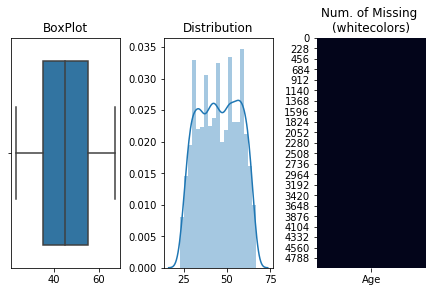

In [63]:
num_analysis(df_raw[['Age']])

By these plot we can see that Age variable have no missing and the data looks to make sense, since its minimum value is about 23

        Experience
count  5000.000000
mean     20.104600
std      11.467954
min      -3.000000
25%      10.000000
50%      20.000000
75%      30.000000
max      43.000000


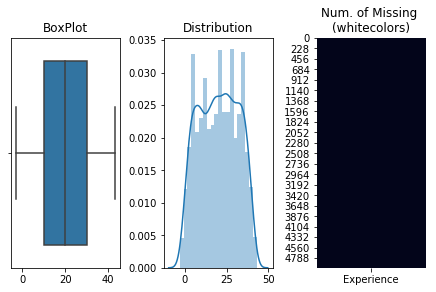

In [64]:
num_analysis(df_raw[['Experience']])

For Experience there is a value that doesnt make sense -3 as the minumum value. Let`s check how many rows we have with negative values

In [67]:
df_raw[df_raw['Experience']<0].shape

(52, 14)

It`s only one percent of the dataframe that has values that are negative. Despite its seems have no significance 

(about 1% of the database), I will let it as it is, by now.

            Income
count  5000.000000
mean     73.774200
std      46.033729
min       8.000000
25%      39.000000
50%      64.000000
75%      98.000000
max     224.000000


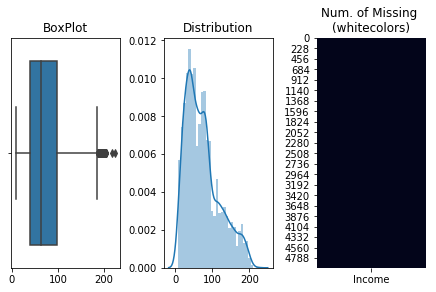

In [69]:
num_analysis(df_raw[['Income']])

For income the values make sense in the distribution: there is few people with large income an most part of the others have average income (+-64k / year)

             CcAvg
count  5000.000000
mean      1.937938
std       1.747659
min       0.000000
25%       0.700000
50%       1.500000
75%       2.500000
max      10.000000


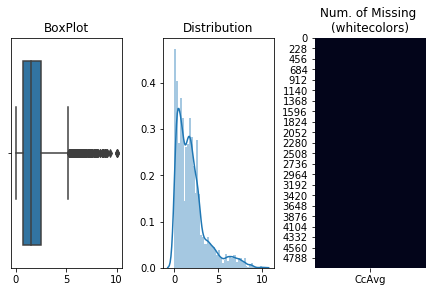

In [71]:
num_analysis(df_raw[['CcAvg']])

Same here for CcAvg. No kind of inputation will be needed.

          Mortgage
count  5000.000000
mean     56.498800
std     101.713802
min       0.000000
25%       0.000000
50%       0.000000
75%     101.000000
max     635.000000


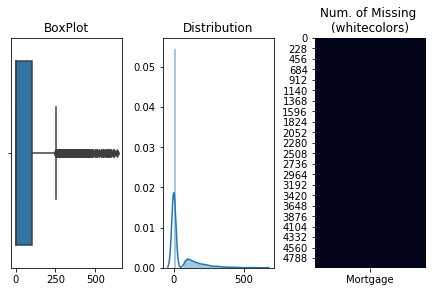

In [72]:
num_analysis(df_raw[['Mortgage']])

For mortgage its distribution is due to only few of customers might have informed mortgages values.

### Looking at the categorical variables

The categorical variables are ok. None of them have discrepancy in their values or missing values.

In [124]:
### generates plots and statistical analysis over categorical variables

def cat_analysis(df, var):
    """Executes a statistical analysis over numerical variables and show information of them"""
    fig, ax = plt.subplots(1,2)
    sns.heatmap(df.isnull(), cbar=False, ax=ax[0]).set(title='Num. of Missing')
    df[var].value_counts().plot(ax=ax[1], kind='bar')
    fig.show()



/Users/reinaldodeoliveiramaciel/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


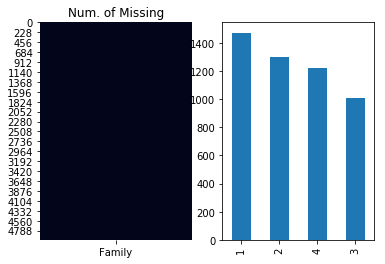

In [125]:
cat_analysis(df_raw[['Family']], 'Family')

So, the families are in most part with only one more person. There`s no need for change since it`s has no missing.

/Users/reinaldodeoliveiramaciel/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


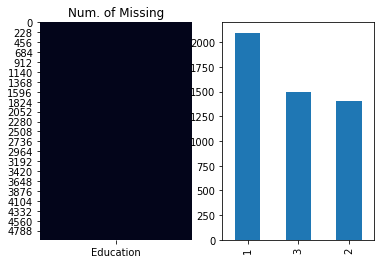

In [126]:
cat_analysis(df_raw[['Education']], 'Education')

Education has complete cases.

/Users/reinaldodeoliveiramaciel/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


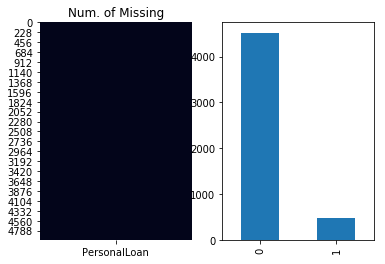

In [127]:
cat_analysis(df_raw[['PersonalLoan']], 'PersonalLoan')

No missing cases and about 10% of PersonalLoans.

/Users/reinaldodeoliveiramaciel/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


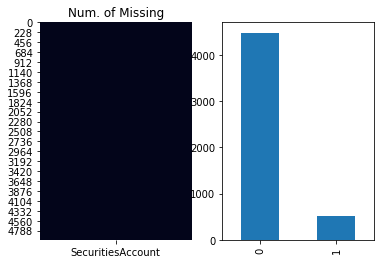

In [128]:
cat_analysis(df_raw[['SecuritiesAccount']], 'SecuritiesAccount')

No missing information. No Discrepancy in values

/Users/reinaldodeoliveiramaciel/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


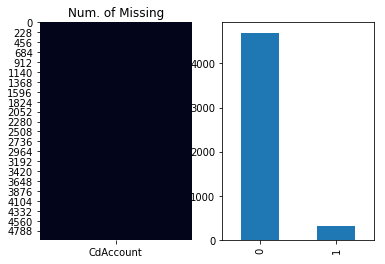

In [129]:
cat_analysis(df_raw[['CdAccount']], 'CdAccount')

No missing Values, No discrepancy.

/Users/reinaldodeoliveiramaciel/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


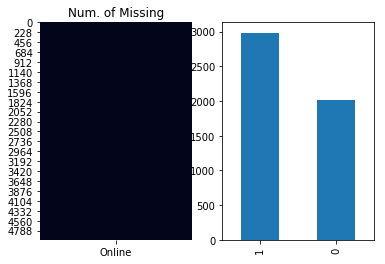

In [131]:
cat_analysis(df_raw[['Online']], 'Online')

No MissingValues, No discrepancy

/Users/reinaldodeoliveiramaciel/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


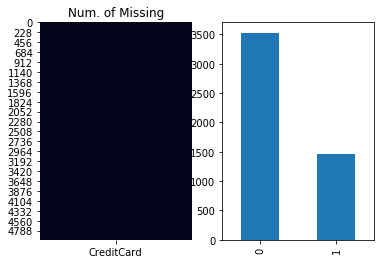

In [133]:
cat_analysis(df_raw[['CreditCard']], 'CreditCard')

No MissingValue, No discrepancy.

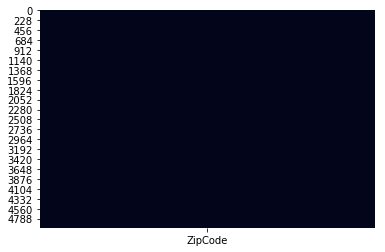

In [139]:
sns.heatmap(df_raw[['ZipCode']].isnull(), cbar=False)

No missing in ZipCode

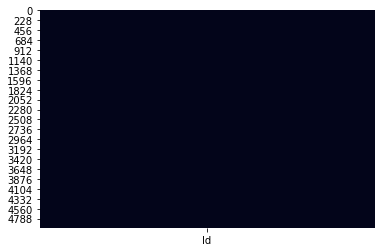

In [140]:
sns.heatmap(df_raw[['Id']].isnull(), cbar=False)

No missing in ID

# 02 - EDA

### Number of unique values in each column

Id                   5000
Age                    45
Experience             47
Income                162
ZipCode               467
Family                  4
CcAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CdAccount               2
Online                  2
CreditCard              2
dtype: int64


[Text(0.5, 1.0, 'Number of unique values per column')]

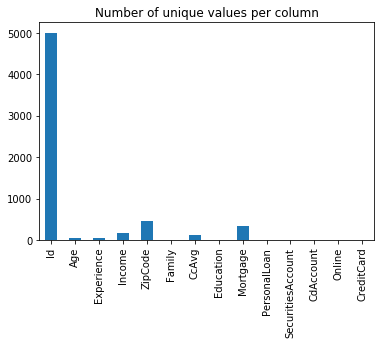

In [159]:
cols = df_raw.columns
print(df_raw[cols].nunique())
df_raw[cols].nunique().plot.bar().set(title='Number of unique values per column')

### Number of people with 0 mortgage

In [164]:
df_raw[df_raw['Mortgage']==0].shape

(3462, 14)

It means that 3462/5000 = 68% of the people have 0 mortgage.

### Number of people with zero credit card spending per month

In [167]:
df_raw[df_raw['CreditCard']=='0'].shape

(3530, 14)

It means that 3530/5000 = 70% of the people have 0 spending per month.

### Value counts of all categorical columns.

By these plots with bivariate analysis it was possible to notice:

ZIPCode has several values and its not possible to say that a specific location may imply into a Personal Loan;
Level of Education, Security Account, CdAccount, Online Customers and Credit Card Customers might have some impact on Personal Loan

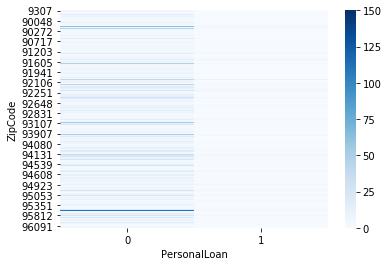

In [218]:
sns.heatmap(pd.crosstab(df_raw['ZipCode'],df_raw['PersonalLoan']), cmap='Blues')

Due to the high number of different values we have in ZipCode, It seens doesn`t make sense to use these variable.

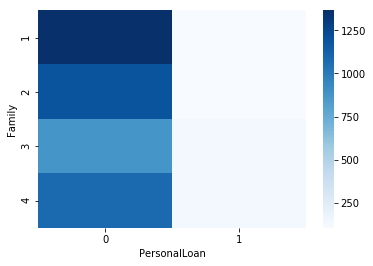

In [219]:
sns.heatmap(pd.crosstab(df_raw['Family'],df_raw['PersonalLoan']), cmap='Blues')

We also can see that by this plot none of the different family sizes have influence on Personal Loan.

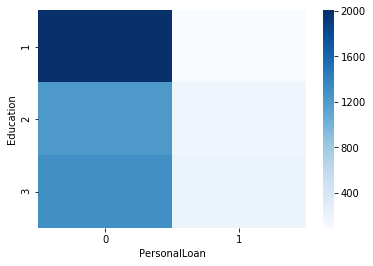

In [220]:
sns.heatmap(pd.crosstab(df_raw['Education'],df_raw['PersonalLoan']), cmap='Blues')

For levels of education 3 and 2 (graduated and professional) are more likely to have Personal Loans

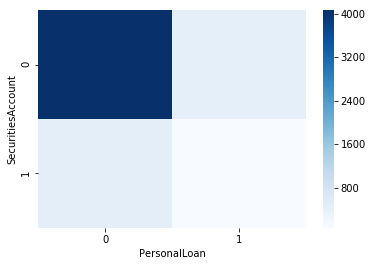

In [224]:
sns.heatmap(pd.crosstab(df_raw['SecuritiesAccount'],df_raw['PersonalLoan']), cmap='Blues')

That`s very interesting. The ones with Security Account in the bank are not likely to have PersonalLoan at all. This might be due to some business rule.

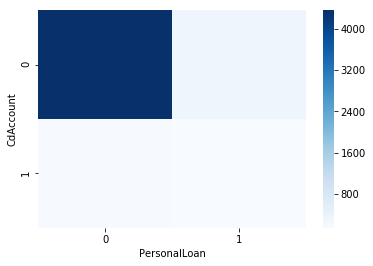

In [225]:
sns.heatmap(pd.crosstab(df_raw['CdAccount'],df_raw['PersonalLoan']), cmap='Blues')

Those with CdAccount are not likely to have Personal Loan

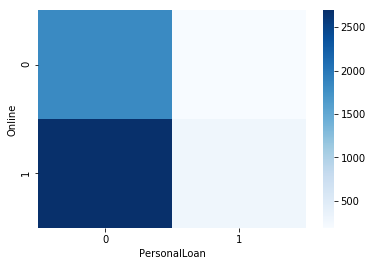

In [226]:
sns.heatmap(pd.crosstab(df_raw['Online'],df_raw['PersonalLoan']), cmap='Blues')

Online customers are more likely to have Personal loans

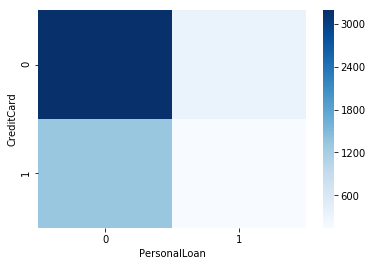

In [227]:
sns.heatmap(pd.crosstab(df_raw['CreditCard'],df_raw['PersonalLoan']), cmap='Blues')

CreditCard Customers are not likely to have PersonalLoans.

# 03 - Model Building

In [237]:
## removing 
X = df_raw.drop(['Id','PersonalLoan'], axis=1)
Y = df_raw['PersonalLoan']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=200)

x_train.head()

,Age,Experience,Income,ZipCode,Family,CcAvg,Education,Mortgage,SecuritiesAccount,CdAccount,Online,CreditCard
4543,62,38,33.0,95134,3,0.1,3,0.0,0,0,1,0
789,29,3,31.0,92126,4,0.3,2,0.0,0,0,1,0
3341,35,9,33.0,91125,2,0.3,1,0.0,1,0,1,0
2327,51,25,70.0,90095,1,0.8,3,0.0,1,0,1,0
396,50,24,29.0,93023,4,0.1,1,0.0,0,0,0,0


In [240]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")

model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.009915  0.006757  0.036614 -0.000072  0.013026  0.006496  0.015155   

          7         8         9       10        11  intercept  
0  0.000386  0.001115  0.005038  0.00115 -0.000024  -0.000009  


As this is a logistic regression its much more difficult to interpret what does the coefficients values mean. Lets check model score:


In [241]:
model_score = model.score(x_test, y_test)
print(model_score)

0.906


This is the model Accuracy, which seems good at a first glance.

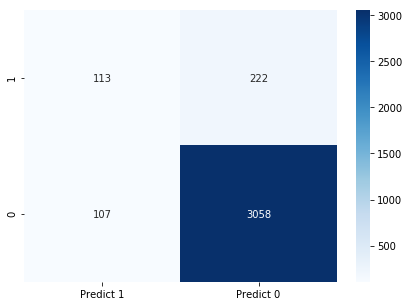

In [247]:
###ploting confusion matrix

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

This model has a good accuracy, but fo all of the real 1`s, it only detected 33%. Let`s check AUC and ROC CURVE.

In [259]:
pass

In [254]:
fpr, tpr, thrs = metrics.roc_curve(y_test, y_predict)

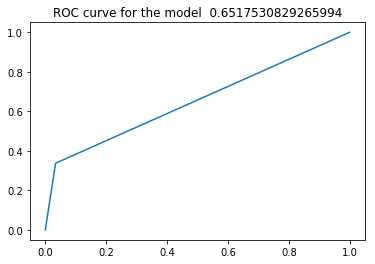

In [258]:
plt.plot(fpr, tpr)
plt.title('ROC curve for the model  '+str(np.trapz(tpr,fpr)))
plt.show()

This model is not very good. 65% of AUC is a poor performance on detecting PersonalLoan.

# 04 - How the model can be improved

- There are some improvements that can be done in this model:
    - Setting a balanced class parameter;
    - Feature Scaling / Normalization
    
Next, I create some dummies variables and make a feature normalization:
    

0.952


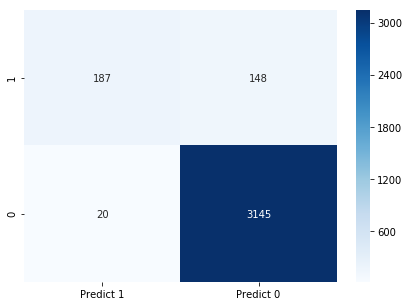

In [268]:
##one hot encoding
new_df = pd.get_dummies(df_raw.drop('PersonalLoan', axis=1))

### max min scale
new_df = new_df - new_df.min()
new_df = new_df / new_df.max()

X = new_df
Y = df_raw['PersonalLoan']
##split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=200)
x_train.head()

# Fit the model on train
model = LogisticRegression(solver="liblinear")

model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

model_score = model.score(x_test, y_test)
print(model_score)


###ploting confusion matrix

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')


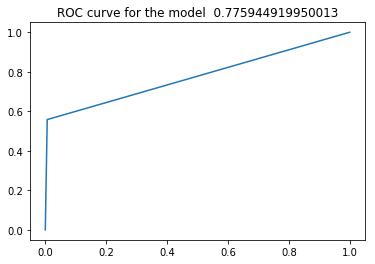

In [269]:
fpr, tpr, thrs = metrics.roc_curve(y_test, y_predict)
plt.plot(fpr, tpr)
plt.title('ROC curve for the model  '+str(np.trapz(tpr,fpr)))
plt.show()

Only by doing some Feature engineering it was possible to increase AUC by 12% and ACC by 5%.

# 05 - Business Understanding of my model

So, what does it mean that increate in AUC and ACC only by those feature engineering? Well, it means that what was showed in EDA for categorical variable is true for the model: Some categorical variables has much more impact than others. So it means that TheraBank may have some policies to loan due to the customer products.

And the scaling on numerical variables show that we have some values that are very different scales. It means that Therbank has a very different profile of customers with low and high incomes, mortgages, years of experience and CcAvg. They could group the most similar customers to understand PersonalLoan.